### Network Packet Classification using Support Vector Machines
##### Data Science for Cyber Security Course

In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Step 2: Create Sample Network Traffic Data
# In real scenarios, this data would come from network monitoring tools
np.random.seed(42)  # For reproducible results

# Generate synthetic network packet data
n_samples = 1000

# Features that might indicate malicious activity
data = {
    'protocol_type': np.random.choice(['TCP', 'UDP', 'ICMP'], n_samples, p=[0.6, 0.3, 0.1]),
    'packet_size': np.random.normal(500, 200, n_samples),  # bytes
    'port_number': np.random.randint(1, 65536, n_samples),
    'connection_duration': np.random.exponential(2, n_samples),  # seconds
    'bytes_sent': np.random.normal(1000, 500, n_samples),
    'bytes_received': np.random.normal(800, 400, n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)
df.head()

,protocol_type,packet_size,port_number,connection_duration,bytes_sent,bytes_received
0,TCP,535.540200,24001,6.469349,434.898138,1569.378318
1,ICMP,232.931128,45497,0.438616,2205.838338,490.154012
2,UDP,576.039570,10333,6.049491,1758.197028,124.326785
3,TCP,622.117149,42605,10.525628,1301.059160,611.494504
4,TCP,611.958090,2801,2.487666,1036.018431,9.804892


In [4]:
# Step 3: Create Target Labels (Malicious vs Benign)
# In reality, these labels would come from security experts or known attack signatures
def create_malicious_labels(row):
    """
    Simple rule-based approach to simulate malicious traffic patterns
    In real scenarios, this would be based on actual security analysis
    """
    malicious_score = 0
    
    # Large packets might indicate data exfiltration
    if row['packet_size'] > 800:
        malicious_score += 1
    
    # Unusual port ranges (common attack vectors)
    if row['port_number'] < 1024 or row['port_number'] > 49152:
        malicious_score += 1
    
    # Long connection durations might indicate persistent threats
    if row['connection_duration'] > 5:
        malicious_score += 1
    
    # High data transfer might indicate data theft
    if row['bytes_sent'] > 1500 or row['bytes_received'] > 1200:
        malicious_score += 1
    
    # If multiple suspicious characteristics, likely malicious
    return 1 if malicious_score >= 2 else 0

df['is_malicious'] = df.apply(create_malicious_labels, axis=1)

print(f"Dataset created with {len(df)} network packets")
print(f"Malicious packets: {df['is_malicious'].sum()}")
print(f"Benign packets: {len(df) - df['is_malicious'].sum()}")

Dataset created with 1000 network packets
Malicious packets: 142
Benign packets: 858


In [8]:
df.head()

,protocol_type,packet_size,port_number,connection_duration,bytes_sent,bytes_received,is_malicious
0,TCP,535.540200,24001,6.469349,434.898138,1569.378318,1
1,ICMP,232.931128,45497,0.438616,2205.838338,490.154012,0
2,UDP,576.039570,10333,6.049491,1758.197028,124.326785,1
3,TCP,622.117149,42605,10.525628,1301.059160,611.494504,0
4,TCP,611.958090,2801,2.487666,1036.018431,9.804892,0


In [10]:
# Step 4: Data Preprocessing
print("\n--- Data Preprocessing ---")

# Handle categorical variables (protocol_type)
label_encoder = LabelEncoder()
df['protocol_encoded'] = label_encoder.fit_transform(df['protocol_type'])

# Select features for the model
feature_columns = ['protocol_encoded', 'packet_size', 'port_number', 
                  'connection_duration', 'bytes_sent', 'bytes_received']

X = df[feature_columns]
y = df['is_malicious']

print("Features selected:", feature_columns)
print("Data shape:", X.shape)


--- Data Preprocessing ---
Features selected: ['protocol_encoded', 'packet_size', 'port_number', 'connection_duration', 'bytes_sent', 'bytes_received']
Data shape: (1000, 6)


In [12]:
X.head()

,protocol_encoded,packet_size,port_number,connection_duration,bytes_sent,bytes_received
0,1,535.540200,24001,6.469349,434.898138,1569.378318
1,0,232.931128,45497,0.438616,2205.838338,490.154012
2,2,576.039570,10333,6.049491,1758.197028,124.326785
3,1,622.117149,42605,10.525628,1301.059160,611.494504
4,1,611.958090,2801,2.487666,1036.018431,9.804892


In [20]:
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 700 samples
Testing set: 300 samples


In [22]:
# Step 6: Feature Scaling (Important for SVM!)
# SVMs are sensitive to feature scales, so we normalize all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


In [26]:
X_test_scaled

array([[-0.30718186,  0.26985505,  0.64909051, -0.55963566, -0.69218834,
         0.21742821],
       [-0.30718186, -0.51620291, -1.3622876 ,  1.35613035, -1.33657458,
        -0.11295305],
       [-0.30718186, -1.48445527, -1.30756737, -0.90559254,  2.06535601,
         0.24630095],
       ...,
       [ 1.34687429,  0.21061303,  1.01754004,  0.1064048 , -0.69728628,
         0.5628708 ],
       [-0.30718186, -0.17830482,  1.12285665, -0.81645871, -0.99547744,
         0.37776542],
       [-0.30718186,  0.19485202, -0.50130315, -0.7408785 , -0.12232397,
        -2.03210255]])

In [21]:
# Step 7: Train the SVM Model
print("\n--- Training SVM Model ---")

# Create and train SVM classifier
# RBF kernel works well for non-linearly separable data
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

print("SVM model trained successfully!")


--- Training SVM Model ---
SVM model trained successfully!


In [23]:
# Step 8: Make Predictions
y_pred = svm_model.predict(X_test_scaled)

print("\n--- Model Performance ---")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Benign', 'Malicious']))



--- Model Performance ---
Accuracy: 0.923

Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.98      0.96       257
   Malicious       0.86      0.56      0.68        43

    accuracy                           0.92       300
   macro avg       0.89      0.77      0.82       300
weighted avg       0.92      0.92      0.92       300



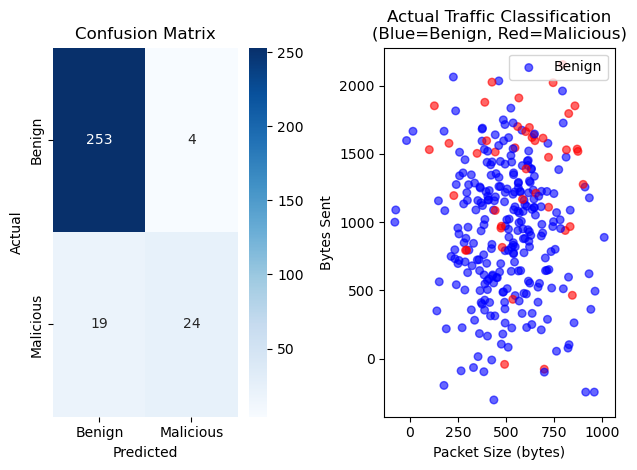

In [27]:
# Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malicious'],
            yticklabels=['Benign', 'Malicious'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Feature importance visualization (packet size vs bytes sent)
plt.subplot(1, 2, 2)
colors = ['blue' if label == 0 else 'red' for label in y_test]
plt.scatter(X_test['packet_size'], X_test['bytes_sent'], 
           c=colors, alpha=0.6, s=30)
plt.xlabel('Packet Size (bytes)')
plt.ylabel('Bytes Sent')
plt.title('Actual Traffic Classification\n(Blue=Benign, Red=Malicious)')
plt.legend(['Benign', 'Malicious'])

plt.tight_layout()
plt.show()

In [29]:
# Step 10: Test with New Network Packets
print("\n--- Testing with New Packets ---")


--- Testing with New Packets ---


In [31]:
# Simulate analyzing new incoming packets
new_packets = pd.DataFrame({
    'protocol_encoded': [0, 1, 2],  # TCP, UDP, ICMP
    'packet_size': [300, 1200, 150],
    'port_number': [80, 31337, 443],  # HTTP, suspicious port, HTTPS
    'connection_duration': [1.5, 8.0, 0.5],
    'bytes_sent': [500, 2000, 200],
    'bytes_received': [400, 1800, 180]
})

# Scale the new data using the same scaler
new_packets_scaled = scaler.transform(new_packets)

# Make predictions
predictions = svm_model.predict(new_packets_scaled)
probabilities = svm_model.decision_function(new_packets_scaled)

In [33]:
print("New Packet Analysis:")
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    status = "MALICIOUS" if pred == 1 else "BENIGN"
    confidence = abs(prob)
    print(f"Packet {i+1}: {status} (Confidence: {confidence:.2f})")

print("\n--- Key Insights ---")
print("1. SVM found a decision boundary to separate malicious from benign packets")
print("2. The model considers multiple features simultaneously")
print("3. Higher confidence scores indicate clearer classification")
print("4. In production, this would trigger alerts for malicious packets")

New Packet Analysis:
Packet 1: BENIGN (Confidence: 0.99)
Packet 2: MALICIOUS (Confidence: 0.49)
Packet 3: BENIGN (Confidence: 0.62)

--- Key Insights ---
1. SVM found a decision boundary to separate malicious from benign packets
2. The model considers multiple features simultaneously
3. Higher confidence scores indicate clearer classification
4. In production, this would trigger alerts for malicious packets


In [35]:
# Step 11: Detailed Analysis - Compare Actual vs Predicted Classifications
print("\n" + "="*60)
print("DETAILED PACKET ANALYSIS: ACTUAL vs PREDICTED")
print("="*60)

# Create a comprehensive comparison DataFrame
comparison_df = X_test.copy()
comparison_df['Actual_Label'] = y_test.values
comparison_df['Predicted_Label'] = y_pred
comparison_df['Classification_Status'] = ['Correct' if actual == pred else 'Incorrect' 
                                        for actual, pred in zip(y_test, y_pred)]

# Add readable labels
comparison_df['Actual_Class'] = ['Malicious' if x == 1 else 'Benign' for x in comparison_df['Actual_Label']]
comparison_df['Predicted_Class'] = ['Malicious' if x == 1 else 'Benign' for x in comparison_df['Predicted_Label']]

# Add protocol names back
protocol_names = {0: 'TCP', 1: 'UDP', 2: 'ICMP'}
comparison_df['Protocol'] = comparison_df['protocol_encoded'].map(protocol_names)

# Show first 20 predictions with all details
print("\nFirst 20 Test Packets - Detailed Classification Results:")
print("-" * 120)
display_columns = ['Protocol', 'packet_size', 'port_number', 'connection_duration', 
                  'bytes_sent', 'bytes_received', 'Actual_Class', 'Predicted_Class', 'Classification_Status']

# Format the display for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.1f}'.format)

print(comparison_df[display_columns].head(20).to_string(index=True))

# Summary statistics
print("\n" + "-" * 60)
print("CLASSIFICATION SUMMARY")
print("-" * 60)

correct_predictions = (comparison_df['Classification_Status'] == 'Correct').sum()
total_predictions = len(comparison_df)

print(f"Total Test Packets: {total_predictions}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {total_predictions - correct_predictions}")
print(f"Overall Accuracy: {correct_predictions/total_predictions:.1%}")

# Break down by class
print("\nDetailed Breakdown:")
actual_benign = (comparison_df['Actual_Label'] == 0).sum()
actual_malicious = (comparison_df['Actual_Label'] == 1).sum()
correctly_identified_benign = ((comparison_df['Actual_Label'] == 0) & 
                              (comparison_df['Predicted_Label'] == 0)).sum()
correctly_identified_malicious = ((comparison_df['Actual_Label'] == 1) & 
                                 (comparison_df['Predicted_Label'] == 1)).sum()

print(f"• Benign Packets: {actual_benign} total, {correctly_identified_benign} correctly identified ({correctly_identified_benign/actual_benign:.1%})")
print(f"• Malicious Packets: {actual_malicious} total, {correctly_identified_malicious} correctly_identified_malicious ({correctly_identified_malicious/actual_malicious:.1%})")

# Show misclassified packets for analysis
print("\n" + "-" * 60)
print("MISCLASSIFIED PACKETS ANALYSIS")
print("-" * 60)

misclassified = comparison_df[comparison_df['Classification_Status'] == 'Incorrect']
if len(misclassified) > 0:
    print(f"Found {len(misclassified)} misclassified packets:")
    print("\nMisclassified Packets Details:")
    print(misclassified[display_columns].to_string(index=True))
    
    # Analyze common patterns in misclassifications
    print("\nMisclassification Patterns:")
    false_positives = misclassified[misclassified['Actual_Label'] == 0]  # Benign predicted as Malicious
    false_negatives = misclassified[misclassified['Actual_Label'] == 1]  # Malicious predicted as Benign
    
    print(f"• False Positives (Benign → Malicious): {len(false_positives)}")
    print(f"• False Negatives (Malicious → Benign): {len(false_negatives)}")
    
    if len(false_positives) > 0:
        print(f"  - Average packet size of false positives: {false_positives['packet_size'].mean():.1f} bytes")
    if len(false_negatives) > 0:
        print(f"  - Average packet size of false negatives: {false_negatives['packet_size'].mean():.1f} bytes")
else:
    print("Excellent! No misclassified packets in this test set.")

# Show some interesting cases
print("\n" + "-" * 60)
print("INTERESTING CASES")
print("-" * 60)

# Show examples of clearly malicious packets
clear_malicious = comparison_df[(comparison_df['Actual_Label'] == 1) & 
                               (comparison_df['Predicted_Label'] == 1)]
if len(clear_malicious) > 0:
    print("Examples of correctly identified malicious packets:")
    print(clear_malicious[display_columns].head(3).to_string(index=False))

# Show examples of clearly benign packets
print("\nExamples of correctly identified benign packets:")
clear_benign = comparison_df[(comparison_df['Actual_Label'] == 0) & 
                            (comparison_df['Predicted_Label'] == 0)]
if len(clear_benign) > 0:
    print(clear_benign[display_columns].head(3).to_string(index=False))

print("\n" + "="*60)
print("This detailed analysis helps security analysts understand:")
print("1. Which packets are being correctly/incorrectly classified")
print("2. Patterns in misclassifications that might need model improvement")
print("3. Confidence in the model's decisions for real-world deployment")
print("="*60)


DETAILED PACKET ANALYSIS: ACTUAL vs PREDICTED

First 20 Test Packets - Detailed Classification Results:
------------------------------------------------------------------------------------------------------------------------
    Protocol  packet_size  port_number  connection_duration  bytes_sent  bytes_received Actual_Class Predicted_Class Classification_Status
63       UDP        576.5        44200                  0.9       645.3           872.5       Benign          Benign               Correct
855      UDP        419.3         6156                  4.8       314.1           743.3       Benign          Benign               Correct
592      UDP        225.6         7191                  0.2      2062.4           883.8       Benign          Benign               Correct
314     ICMP        646.5         5499                  0.2      1108.3           410.4       Benign          Benign               Correct
462     ICMP        383.7        27104                  4.1       761.2        